# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель проекта: установить параметры, которые позволят построить автоматизированную систему, отслеживающую аномалии и мошенническую деятельность.
    
Имеющиеся данные: данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn
df = pd.read_csv('real_estate_data.csv', sep='\t')
df.head(5) # Посмотрим, как выглядит наш датасет

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.info() # общая информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В датасете 22 столбца. Тип данных разный: int, float, object, bool. В некоторых столбцах тип данных необходимо заменить. Видно, что есть пропуски. 

Согласно документации к данным:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)*
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

In [3]:
df.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
df.isna().mean() # Посмотрим долю пропущенных значений среди всех данных

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [5]:
df.duplicated().sum() # Проверка на дубликаты

0

### Вывод

Мы видим, что в данных много пропущенных значений. Заменим лишь те, пропуски которых можно объяснить очевидной причиной:
* количество балконов NaN заменим на 0, так как вероятно, что в квартире балкона вовсе нет и вместо 0 был указан пропуск, который превратился в NaN;
* аналогично поступим с числом водоёмов в радиусе 3 км и с числом парков в радиусе 3 км (замена на 0);
* в столбце, в котором указано, является ли квартира апартаментами, заменим NaN на False;

38% квартир не имеет информации о высоте потолков. Это очень высокий процент, а этот столбец нам важен для дальнейшего анализа. Попробуем заполнить пропущенные значения медианным значением с группировкой по количеству этажей в здании. 

Пропуски в других столбцах оставим без изменений, так как у нас нет подходящих данных для их замены, а заполнение средними или медианными значениями может исказить общую картину.

*Гипотезы по возникновению пропусков в данных*
    
ceiling_height: 38% квартир не имеет информации о высоте потолков. Это очень высокий процент, а этот столбец нам важен для дальнейшего анализа. Логично предположить, что высота потолка в квартире связана с количеством этажей в здании, поэтому заменим пропущенные значения медианным значением с группировкой по количеству этажей.
    
floors_total: Есть небольшое количество квартир, в которых не указано количество этажей в здании. Так как эти строки терять не хочется, сделаем допущение и заменим эти пропуски на этаж самой квартиры. 
    
balcony: В 48% случаев не указано количество балконов. Вероятная причина - если в квартире нет ни одного балкона, то был поставлен прочерк, который превратился в пропуск, а на самом неделе это нулевое значение.

living_area, kitchen_area: В данных столбцах есть пропуски, которые нам необходимо обработать, так как эти параметры важны нам для дальнейшего анализа. Заменим пропуски на основе того, что жилая площадь и площадь кухни зависят от общей площади квартиры. 
    
is_apartment: Пропуски можно объяснить тем, что вместо указания, что квартира НЕ являеттся апартаментами, был поставлен пропуск, поэтому мы можем заменить все пропущенные значения на False.
    
cityCenters_nearest, parks_nearest, ponds_nearest, parks_around3000, ponds_around3000, airports_nearest: пропуски в этих столбцах оставим без изменений, так как у нас нет подходящих данных для их замены, а заполнение средними или медианными значениями может исказить общую картину. Я посмотрела населенные пункты, в которых есть пропуски в этих столбцах и стало ясно, что это все маленькие населенные пункты, в которых указать данную информацию, вероятно, просто невозможно, так как, например, аэропорта просто может не быть рядом.

Дубликаты не обнаружены.

## Предобработка данных

Изменим значения даты публикации на тип даты

In [6]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

Для удобства приведем стоимость квартиры к целому числу

In [7]:
df['last_price'] = df['last_price'].astype(int)

Заменим пропуски в столбце с количеством этажей в здании

In [8]:
df.loc[df["floors_total"].isnull(), "floors_total"] = df.loc[df["floors_total"].isnull(), "floor"]

Заменим пропуски в столбце с высотой потолков на медианное значением с группировкой по количеству этажей

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('floors_total')['ceiling_height'].transform("median"))

Заменим пропуски в столбцах с жилой площадью и площадью кухни

In [10]:
living_ratio = df['living_area'].mean() / df['total_area'].mean()
kitchen_ratio = df['kitchen_area'].mean() / df['total_area'].mean()
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True)

Заменим пропуски в столбце про апартаменты и заменим тип данных на булев 

In [11]:
df['is_apartment'] = df['is_apartment'].fillna(False).astype(bool)

Заменим пропуски в столбце balcony и заменим тип данных на целочисленнный

In [12]:
df['balcony'] = df['balcony'].fillna(0).astype(int) 

Посмотрим, в каких населенных пунктах есть пропуски в столбце cityCenters_nearest

In [13]:
df[df["cityCenters_nearest"].isnull()]['locality_name'].value_counts().head(15)

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Волхов                     111
Кингисепп                  104
Тосно                      104
Никольское                  93
Коммунар                    89
Name: locality_name, dtype: int64

Приведем этажность к целым числам

In [14]:
df['floors_total'] = df['floors_total'].astype(int)

In [15]:
df.info() # Посмотрим, что получилось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23698 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Если для анализа будет необходимо убрать имеющиеся пропуски, то вернемся к ним еще раз.

## Расчёты и добавление результатов в таблицу

In [16]:
# Добавление столбца с ценой за квадратный метр
df['sq_meter_price'] = df['last_price'] / df['total_area'] 
df['sq_meter_price'] = df['sq_meter_price'].astype('int')

# Добавление столбцов с днем недели, месяцем и годом публикации
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

# Добавляем категоризацию по этажам (первый, последний, другой)
def floor_category(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
    
df['floor_category'] = df.apply(floor_category, axis=1)

# Добавление столбца с соотношением жилой и общей площади 
df['living_area_ratio'] = df['living_area'] / df['total_area']

# Добавление столбца с соотношением площади кухни и общей площади 
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2.0,755.0,NaN,120370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.600000,1,False,...,0.0,NaN,81.0,82920,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.300000,4,False,...,2.0,574.0,558.0,92785,3,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.60,14,90.785766,9,False,...,3.0,234.0,424.0,408176,4,7,2015,Другой,0.570980,0.175146
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1.0,48.0,121.0,100000,1,6,2018,Другой,0.320000,0.410000


## Исследовательский анализ данных

**4.1 Площадь**

In [17]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

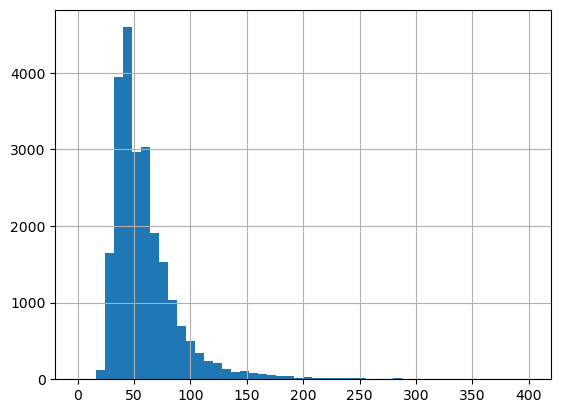

In [18]:
df['total_area'].hist(bins=50, range=(0,400))

Общий метраж квартир колеблется от 12 квадратных метров до 900, среднее значение - 60 квадратных метров. 
Из графика видно, что большая часть квартир имеет площадь от 45 до 60 квадратных метров (что соответсвует
действительности). Количество квартир с площадью больше 100 м2 стремительно убывает.

**4.2 Цена**

In [19]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

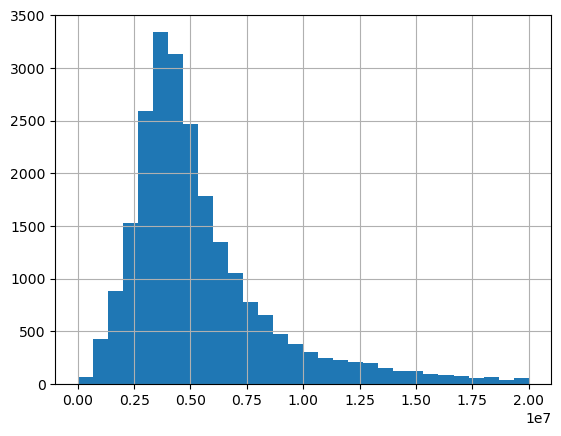

In [20]:
df['last_price'].hist(bins=30, range=(0,20000000))

Стоимость квартир сильно варьируется: от 12 тыс до 763 млн рублей, средняя стоимость - 6.5 млн рублей, медиана - 4.6 млн. 


Аномальные значения - слишком маленькие и слишком большие значения стоимости. Можно сделать предположение, что такие дешевые квартиры - это социальное жилье, когда государство предоставляет жилье по "номинальной" цене. Стоимость квартиры за 763 млн рублей звучит маловероятно, но, тем не менее, исключать такую вероятность тоже не будет верным.

**4.3 Число комнат**

In [21]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

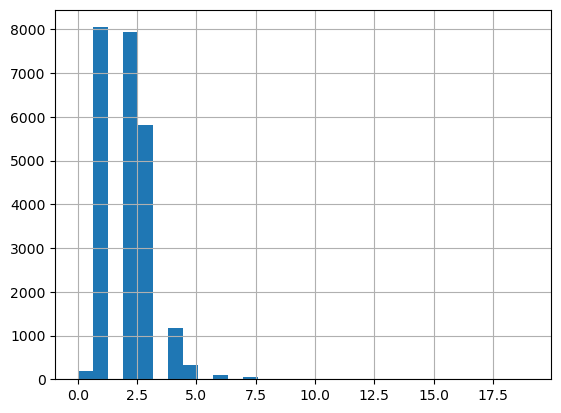

In [22]:
df['rooms'].hist(bins=30)

Количество комнат - от 0 (студия) до 19. Чаще всего попадаются 2х комнатные квартиры.

**4.4 Высота потолков**

In [23]:
df['ceiling_height'].describe()

count    23698.000000
mean         2.736076
std          0.994327
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

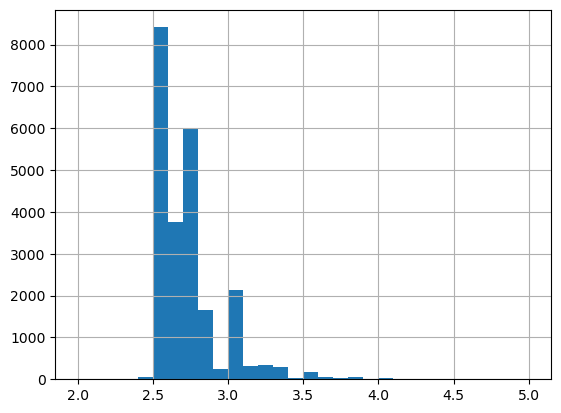

In [24]:
df['ceiling_height'].hist(bins=30, range=(2,5))

Наиболее часто встречаются квартиры с высотой потолков 2.6м. Квартиры с потолком выше 3.5 метров практически не встречаются. В выборке есть явные выбросы (ошибки), например, высота потолка 100м (от этого необходимо избавиться). 

**4.5 Время продажи квартиры**

In [25]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

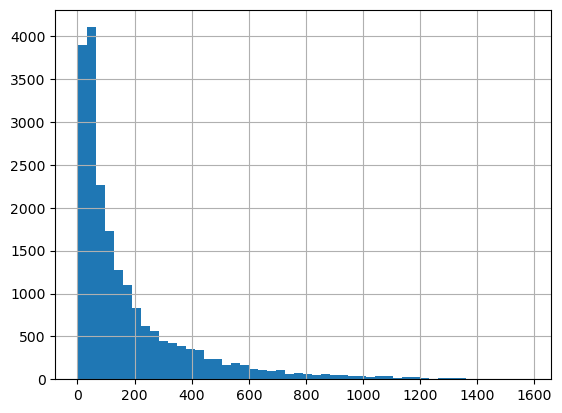

In [26]:
df['days_exposition'].hist(bins=50)

Среднее время продажи квартиры - 180 дней, медиана - 95 дней. Такая большая разница между средним и медианой говорит о том, что в данных есть выбросы. На гистограмме мы тоже видим "длинный хвост", что подтверждает необходимость убрать выбивающиеся значения.





<AxesSubplot:>

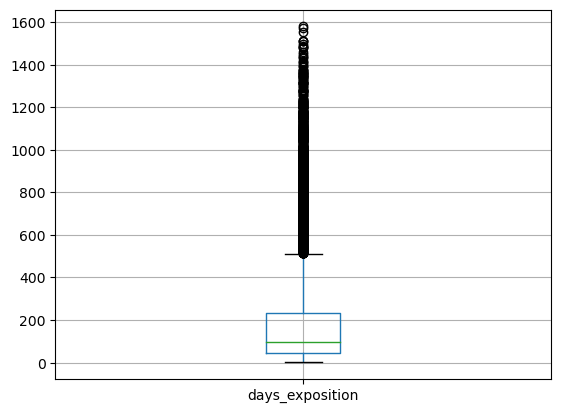

In [27]:
df.boxplot('days_exposition')

Будем считать, что продажа квартиры прошла очень быстро, если она продалась быстрее, чем за 45 дней (Q1), а необычно долго - если дольше 
232 дней (Q3). Обычно продажа занимает около 3 месяцев (95 дней).

*Уберем редкие и выбивающиеся значения*

In [28]:
df_clean = df.query('days_exposition < 500')
df_clean['days_exposition'].describe()

count    18764.000000
mean       127.045726
std        119.120186
min          1.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        499.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

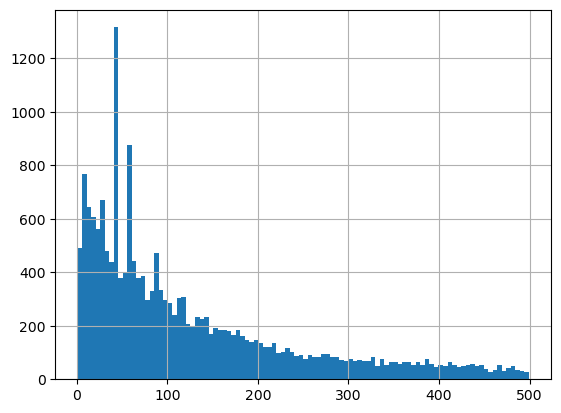

In [29]:
df_clean['days_exposition'].hist(bins=100)

Значения среднего и медианы изменились, теперь они стали ближе друг к другу. Видим пик около 85 дней, будем считать значение средней продолжительностью продажи квартиры.

**4.6 Факторы, влияющие на стоимость квартиры**

*Сначала посмотрим зависимость цены от площади, числа комнат и удаленности от центра.*

Создадим отдельный датасет для удобства анализа.

In [30]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'sq_meter_price',
       'weekday_exposition', 'month_exposition', 'year_exposition',
       'floor_category', 'living_area_ratio', 'kitchen_area_ratio'],
      dtype='object')

In [31]:
df_part = df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]

In [32]:
df_part.head(5)

,last_price,total_area,rooms,cityCenters_nearest
0,13000000,108.0,3,16028.0
1,3350000,40.4,1,18603.0
2,5196000,56.0,2,13933.0
3,64900000,159.0,3,6800.0
4,10000000,100.0,2,8098.0


Посмотрим линейную корреляцию цены с другими параметрами

In [33]:
df_part.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.653675,0.363343,-0.206747
total_area,0.653675,1.000000,0.758344,-0.231446
rooms,0.363343,0.758344,1.000000,-0.184864
cityCenters_nearest,-0.206747,-0.231446,-0.184864,1.000000


Наиболее выражена линейная зависимость между стоимостью и площадью квартиры (коэффициент Пирсона равен 0.65), между стоимостью и количеством комнат корреляция меньше (0.36) и еще меньше - между стоимостью и удаленностью от центра (-0.21). Посмотрим на каждый параметр по отдельности.

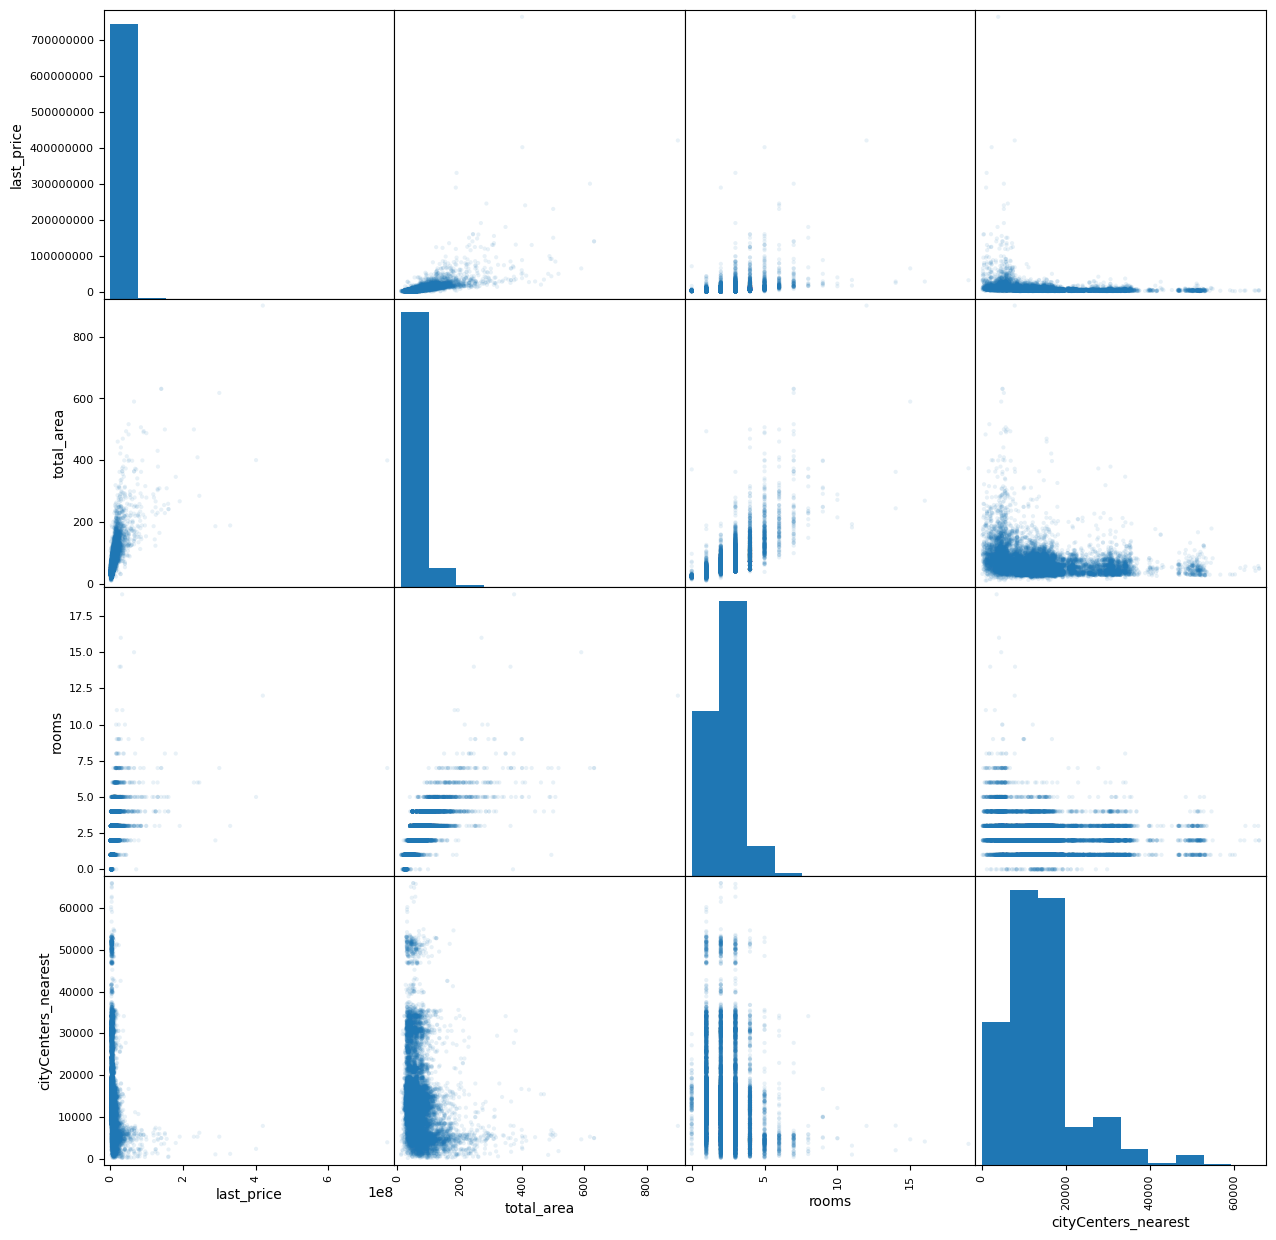

In [34]:
pd.plotting.scatter_matrix(df_part, figsize=(15, 15), alpha=0.1); 

Из графиков можно сделать следующие выводы:
* При увеличении площади, увеличивается стоимость квартиры. Сильная корреляция.
* При увеличении количества комнат, цена увеличивается. В данном случае корреляция не такая сильная, как в случае с площадью. В данных есть явные выбросы, которые искажают картину.
* При увеличении расстояния от центра, стоимость снижается. Значение корреляции отрицательное.

*Зависимость стоимости от этажности*

<AxesSubplot:xlabel='floor_category'>

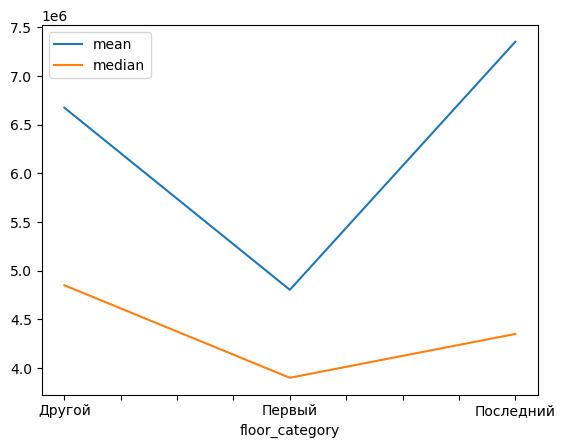

In [35]:
df.groupby('floor_category')['last_price'].agg(['mean', 'median']).plot()

Из графика очевидно, что стоимость квартир на первом этаже значительно ниже, чем на любом другом этаже. Квартиры на последнем этаже стоят дороже, чем на первом этаж, но дешевле, чем все остальные (если смотреть по медиане).

*Зависимость стоимости от даты размещения объявления*

Линейная зависимость между стоимостью квартиры и датой размещения объявления практически отсутсвует. Значения очень маленькие.
Посмотрим на графики.

<AxesSubplot:xlabel='year_exposition'>

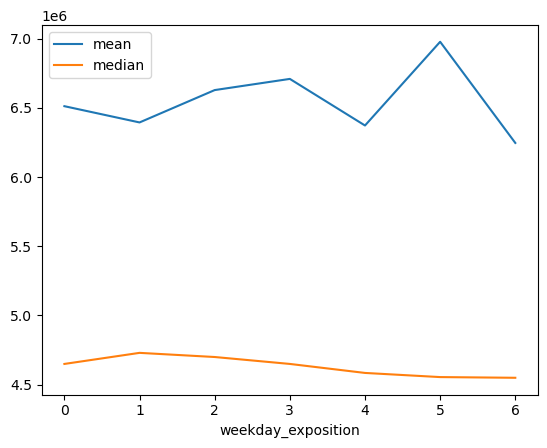

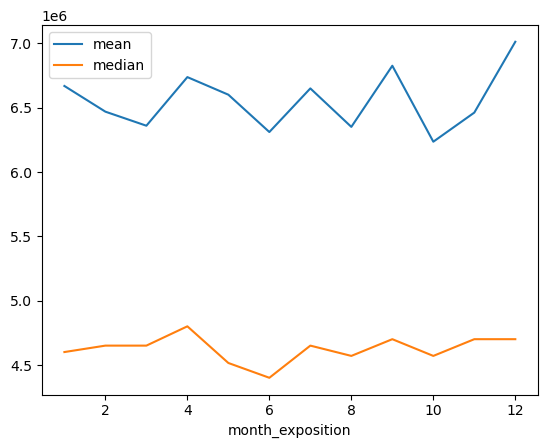

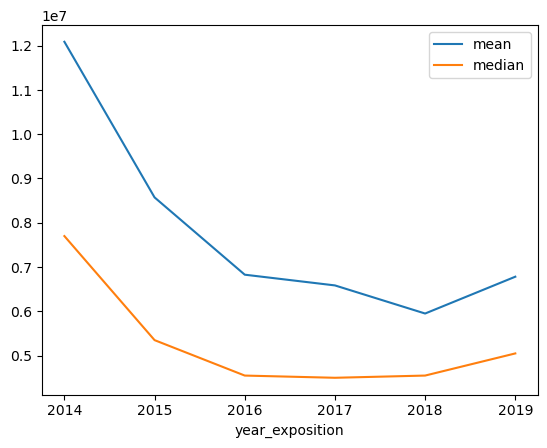

In [36]:
df.groupby('weekday_exposition')['last_price'].agg(['mean', 'median']).plot()
df.groupby('month_exposition')['last_price'].agg(['mean', 'median']).plot()
df.groupby('year_exposition')['last_price'].agg(['mean', 'median']).plot()

Из графиков можно сделать следующие выводы:
* Зависимость между стоимостью квартиры и днем недели размещения объявления не выявлена.
* Стоимость квартир ниже в мае и июне по сравнения с другими месяцами года.
* С 2014 по 2018 год наблюдается снижение средней стоимости квартиры, а с 2018 начинается подъем.

**Анализ 10 населенных пунктов с наибольшим числом объявлений**

In [37]:
top_10 = df.groupby('locality_name')['sq_meter_price'].agg(['count', 'mean']).reset_index().sort_values(by='count', ascending=False).head(10)
top_10.sort_values(by='mean', ascending=False)

,locality_name,count,mean
33,Санкт-Петербург,15721,114848.565231
32,Пушкин,369,103125.373984
93,деревня Кудрово,299,92473.086957
296,посёлок Парголово,327,90175.489297
291,посёлок Мурино,522,85751.733716
326,посёлок Шушары,440,78676.904545
13,Колпино,338,75424.150888
6,Гатчина,307,68745.693811
3,Всеволожск,398,68654.007538
4,Выборг,237,58141.489451


В таблице выше представлены топ-10 населенных пунктов по количеству объявлений. Самая высокая стоимость квадратного метра в Санкт-Петербурге и Пушкине. Завершает этот список Выборг.

**Определение границ центральной зоны Санкт-Петербурга**

<AxesSubplot:xlabel='cityCenters_nearest'>

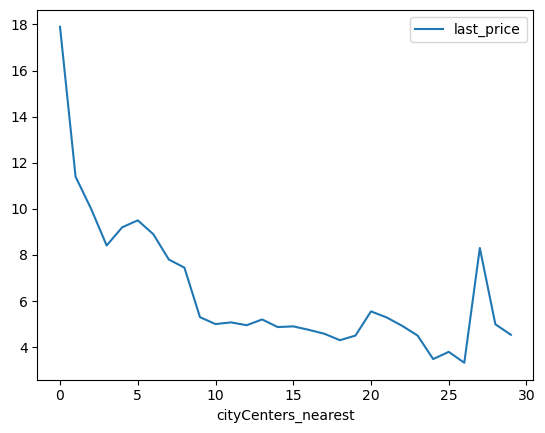

In [38]:
df_spb = df.query('locality_name == "Санкт-Петербург"')     
df_spb = df_spb.dropna(subset = ['cityCenters_nearest']) 
df_spb['cityCenters_nearest'] = (df_spb['cityCenters_nearest'] / 1000).round()
df_spb['last_price'] = df_spb['last_price'] / 1000000

df_spb.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median').plot()

На графике выше представлена зависимость цены квартиры от удаленности от центра. После значений удаленности больше 7 км, стоимость квартир начинает стремительно снижаться. Будем считать центральной зоной Спб - радиус 7 км.

**Анализ недвижимости центрального сегмента Санкт-Петербурга**

In [39]:
df_spb_center = df_spb.query('cityCenters_nearest < 7')
df_spb_center.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
24,8,6.50,97.2,2015-10-31,2,2.80,3,46.5,1,False,...,3.0,124.0,265.0,66872,5,10,2015,Первый,0.478395,0.201646
35,6,15.50,149.0,2017-06-26,5,2.55,5,104.0,4,False,...,1.0,779.0,644.0,104026,0,6,2017,Другой,0.697987,0.114094
61,18,7.99,74.0,2017-08-24,2,3.00,4,43.0,4,False,...,0.0,NaN,609.0,107972,3,8,2017,Последний,0.581081,0.270270
63,2,20.00,118.0,2018-09-11,3,3.00,9,68.0,7,False,...,1.0,779.0,37.0,169491,1,9,2018,Другой,0.576271,0.135593
99,32,9.60,90.0,2017-09-26,4,2.55,5,67.0,2,False,...,0.0,NaN,104.0,106666,1,9,2017,Другой,0.744444,0.088889


**Площадь**

In [40]:
df_spb_center['total_area'].describe()

count    3105.000000
mean       94.671427
std        60.316570
min        12.000000
25%        58.700000
50%        80.000000
75%       111.000000
max       631.200000
Name: total_area, dtype: float64

<AxesSubplot:>

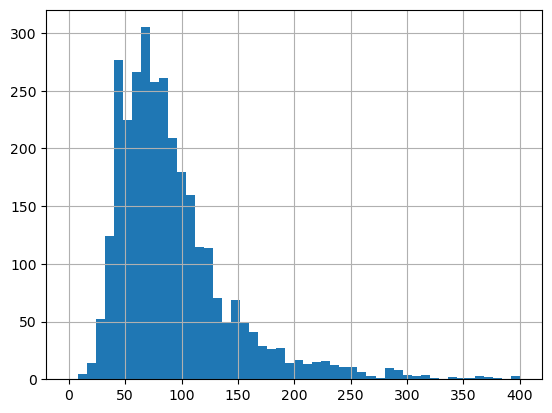

In [41]:
df_spb_center['total_area'].hist(bins=50, range=(0,400))

Общий метраж квартир колеблется от 12 квадратных метров до 631, среднее значение - 94 квадратных метра (что значительно выше, чем по всей выборке). Из графика видно, что большая часть квартир имеет площадь от 40 до 100 квадратных метров . 

**Цена**

In [42]:
df_spb_center['last_price'].describe()

count    3105.000000
mean       14.911812
std        25.101281
min         1.600000
25%         6.800000
50%         9.386000
75%        14.400000
max       763.000000
Name: last_price, dtype: float64

<AxesSubplot:>

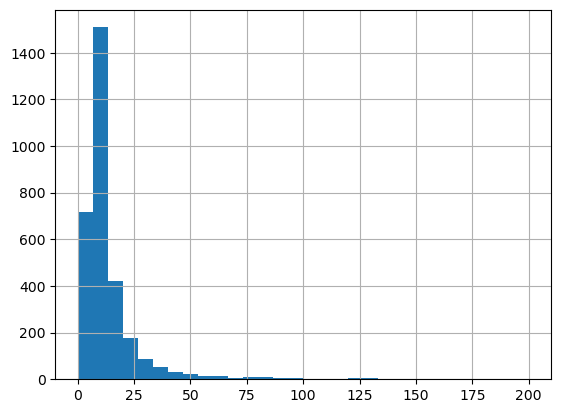

In [43]:
df_spb_center['last_price'].hist(bins=30, range=(0,200))

Стоимость квартир сильно варьируется: от 1.6 до 763 млр рублей, средняя стоимость - 14.9 млн рублей, медиана - 9.3 млн. 

**Число комнат**

In [44]:
df_spb_center['rooms'].describe()

count    3105.000000
mean        2.888889
std         1.489078
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

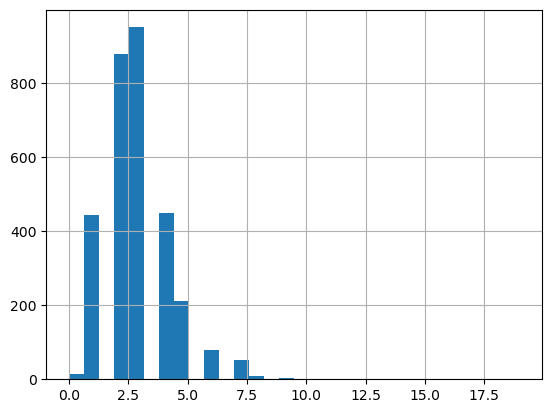

In [45]:
df_spb_center['rooms'].hist(bins=30)

В центре Санкт-Петербурга чаще всего попадаются 3х комнатные квартиры (в отличие от всей выборки, где 2х комнатные квартиры преобладают).

**Высота потолков**

In [46]:
df_spb_center['ceiling_height'].describe()

count    3105.000000
mean        3.011604
std         0.769355
min         2.400000
25%         2.700000
50%         3.000000
75%         3.200000
max        32.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

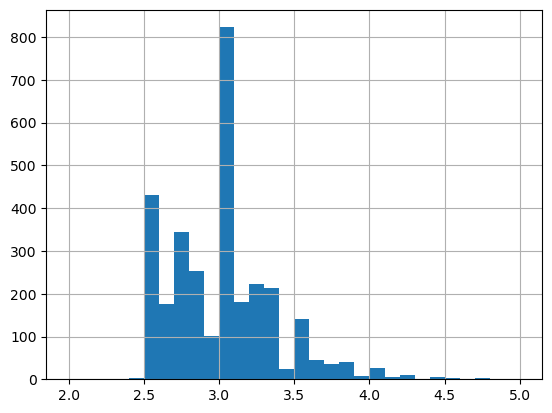

In [47]:
df_spb_center['ceiling_height'].hist(bins=30, range=(2,5))

Наиболее часто встречаются квартиры с высотой потолков 3м (в отличие от 2.6 м по всей выборке).

**Анализ факторов, влияющих на стоимость квартир**

In [48]:
df_spb_center_part = df[['last_price', 'total_area', 'rooms',  'floor_category', 'cityCenters_nearest', 'weekday_exposition', 'month_exposition', 'year_exposition']]

In [49]:
df_spb_center_part.head()

,last_price,total_area,rooms,floor_category,cityCenters_nearest,weekday_exposition,month_exposition,year_exposition
0,13000000,108.0,3,Другой,16028.0,3,3,2019
1,3350000,40.4,1,Первый,18603.0,1,12,2018
2,5196000,56.0,2,Другой,13933.0,3,8,2015
3,64900000,159.0,3,Другой,6800.0,4,7,2015
4,10000000,100.0,2,Другой,8098.0,1,6,2018


<AxesSubplot:xlabel='year_exposition'>

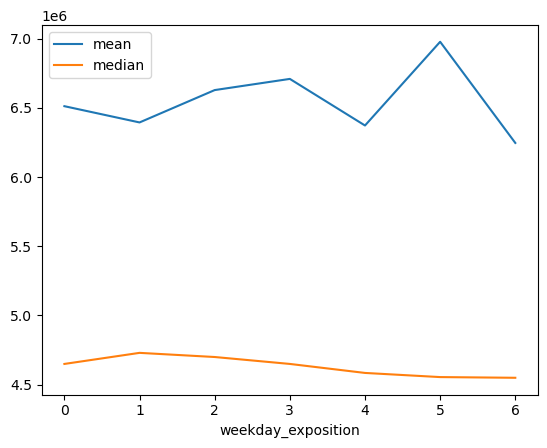

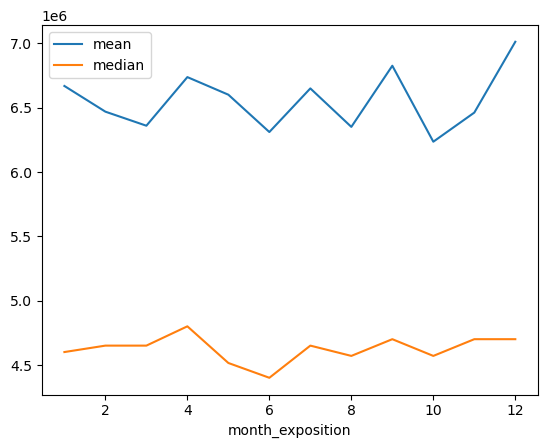

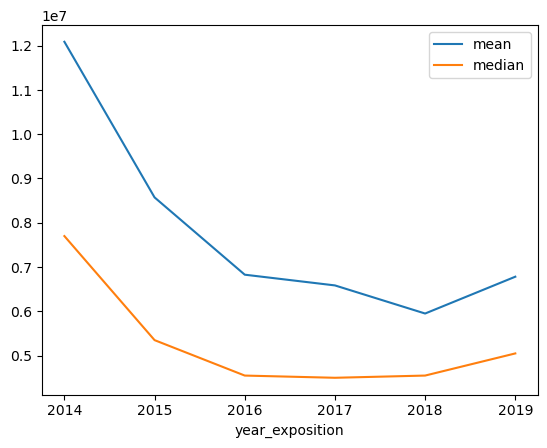

In [50]:
df_spb_center_part.groupby('weekday_exposition')['last_price'].agg(['mean', 'median']).plot()
df_spb_center_part.groupby('month_exposition')['last_price'].agg(['mean', 'median']).plot()
df_spb_center_part.groupby('year_exposition')['last_price'].agg(['mean', 'median']).plot()

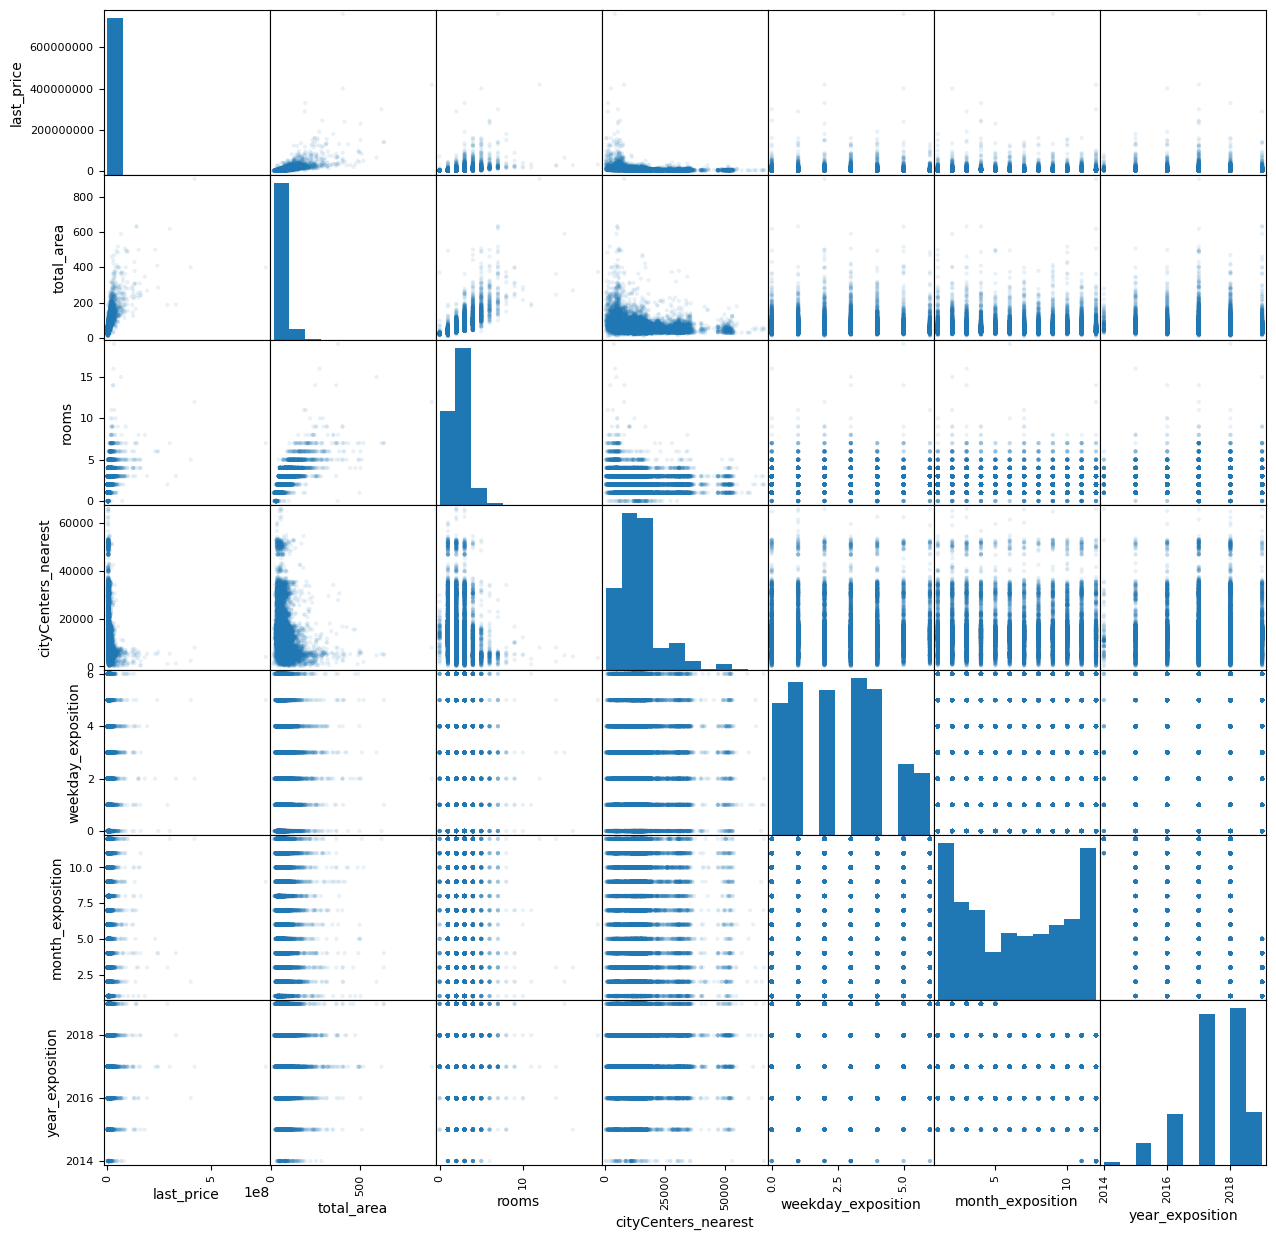

In [51]:
pd.plotting.scatter_matrix(df_spb_center_part, figsize=(15, 15), alpha=0.1);

Наиболее выражена линнейная зависимость между стоимостью и площадью квартиры (коэффициент Пирсона равен 0.65), между стоимостью и количеством комнат корреляция меньше (0.36) и еще меньше - между стоимостью и удаленностью от центра (-0.21). В данном раскладе все показатели практически идентичны показателям по общему массиву данных. 
Зависимость цены от даты размещения практически равна нулю, поэтому рассматривать подробнее ее не будем.

<AxesSubplot:xlabel='floor_category'>

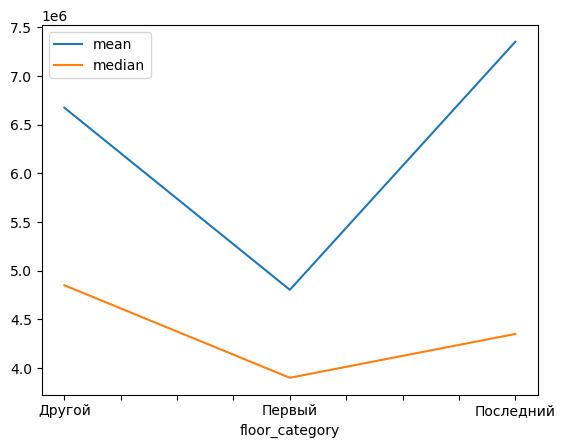

In [52]:
df_spb_center_part.groupby('floor_category')['last_price'].agg(['mean', 'median']).plot() # зависимость от этажности

Стоимость квартир на первом этаже значительно ниже, чем на любом другом этаже. Квартиры на последнем этаже стоят дороже, чем на первом этаж, но дешевле, чем все остальные (если смотреть по медиане). Эти показатели не отличаются от показателей по всей выборке.

*Вывод*

В центре Санкт-Петербурга средняя площадь квартир значительно больше: 94 м2 (против 60м2 по всей выборке). Стоимость квартир тоже выше. В центре Санкт-Петербруга чаще встречаются 3х комнатные квартиры, в то время как по всей выборке мы видим преобладание 2х комнатных квартир. Средняя высота потолков в центральном районе больше на 40 см.

Если говорить о факторах, влияющих на стоимость недвижимости, то анализ сегмента показал, что зависомости остались точно такие же, как мы видели по всей базе. 



## Общий вывод

В процессе работы был проанализирован архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет: сначала была проведена предобработка, а затем исследовательский анализ данных.

Основные выводы:

Средняя площадь квартир по всей базе данных - 60 м2, средняя стоимость - 6.5 млн рублей, высота потолков 2.6 м. Средне время продажи квартиры - 85 дней.

Наиболее выражена линейная зависимость между стоимостью и площадью квартиры, чуть меньше между стоимостью и количеством комнат и еще меньше - между стоимостью и удаленностью от центра.
При увеличении площади, увеличивается стоимость квартиры. При увеличении количества комнат, цена увеличивается.
При увеличении расстояния от центра, стоимость снижается.

Стоимость квартир на первом этаже значительно ниже, чем на любом другом этаже. Квартиры на последнем этаже стоят дороже, чем на первом этаж, но дешевле, чем все остальные.

Зависимость между стоимостью квартиры и днем недели размещения объявления не выявлена.
Стоимость квартир ниже в мае и июне по сравнения с другими месяцами года.
С 2014 по 2018 год наблюдается снижение средней стоимости квартиры, а с 2018 начинается подъем.

Самая высокая стоимость квадратного метра в Санкт-Петербурге и Пушкине.



В центре Санкт-Петербурга (радиус 7 км) средняя площадь квартир и, соответсвенно, стоимость, выше. В центре Санкт-Петербурга чаще встречаются 3х комнатные квартиры, в то время как по всей выборке мы видим преобладание 2х комнатных квартир. Средняя высота потолков в центральном районе больше на 40 см.
Если говорить о факторах, влияющих на стоимость недвижимости, то анализ сегмента показал, что зависимости остались точно такие же, как по всей базе.

